Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City 
Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific 
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5, 
PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library 
to create visualizations that effectively represent the AQI trends and patterns for different 
pollutants in the city. 
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, 
and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to 
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or 
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different 
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and 
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color 
schemes.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import Counter
# Load the dataset
data = pd.read_csv("PNQ_AQI.csv")


In [46]:
data['Date'] = pd.to_datetime(data['Date'])
#data['Date'] = data['Date'].apply(lambda x: int(x.timestamp()))
data.sort_values(by=['Date'], inplace=True, ignore_index=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_8736\2845922035.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [47]:
for _, col in enumerate(list(data.columns[1:3])):
    data[f'{col} BDL'] = data[f'{col}'].map(lambda x: 1 if 'BDL' in x else 0)
    data[f'{col}'] = data[f'{col}'].apply(lambda x: x[-3:])
    data[f'{col}'] = data[f'{col}'].apply(lambda x: 0 if 'NA' in x else int((re.findall(r'\d+',x))[0]))

In [48]:
outlier_features = list(data.columns[1:5])
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        q1 = np.nanpercentile(df[col], 25)
        q3 = np.nanpercentile(df[col], 75)
        iqr = q3 - q1
        outlier_step = 1.5 * iqr
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers

Outliers_to_drop = detect_outliers(data,1,outlier_features)
data.loc[Outliers_to_drop]

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location,SO2 µg/m3 BDL,Nox µg/m3 BDL
1242,2010-12-28,65,128,372.0,NaN,NaN,328.0,MPCB-KR,0,0
1588,2011-07-12,52,60,300.0,555.0,NaN,250.0,MPCB-BSRI,0,0
1665,2011-08-24,56,60,239.0,735.0,NaN,193.0,MPCB-BSRI,0,0
1771,2011-10-26,54,142,225.0,NaN,NaN,183.0,MPCB-KR,0,0
1840,2011-12-01,95,85,237.0,618.0,NaN,191.0,MPCB-BSRI,0,0
1876,2011-12-21,59,52,271.0,417.0,NaN,221.0,MPCB-BSRI,0,0
1889,2011-12-28,59,85,267.0,610.0,NaN,217.0,MPCB-BSRI,0,0
1930,2012-01-14,60,75,285.0,406.0,NaN,235.0,Bhosari,0,0
1941,2012-01-18,61,71,307.0,454.0,NaN,257.0,Bhosari,0,0
4709,2014-12-23,53,9,280.0,NaN,NaN,230.0,Karve Road,0,0


In [49]:
data.drop(Outliers_to_drop, axis = 0, inplace=True)


In [50]:
rep={'MPCB-KR':'Karve Road','MPCB-SWGT':'Swargate','MPCB-BSRI':'Bhosari',\
     'MPCB-NS':'Nal Stop','MPCB-PMPR':'Pimpri','Pimpri Chinchwad':'Chinchwad'}
data['Location'].replace(rep,inplace=True)

In [51]:
data.dropna(axis=0, subset=['AQI'], inplace=True)
data.drop(['CO2 µg/m3'], axis=1, inplace=True)
data.fillna(method='bfill', axis=0, inplace=True)

In [52]:
data = data[['AQI'] + [c for c in data if c not in ['AQI']]]
data.describe()

,AQI,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,SO2 µg/m3 BDL,Nox µg/m3 BDL
count,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000,7749.000000
mean,101.309846,22.737902,52.983611,103.052523,224.831720,0.013034,0.021680
std,43.380645,14.152758,29.450625,57.007840,119.834609,0.113427,0.145647
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,66.000000,14.000000,32.000000,57.000000,123.000000,0.000000,0.000000
50%,100.000000,20.000000,48.000000,94.000000,220.000000,0.000000,0.000000
75%,131.000000,29.000000,70.000000,141.000000,304.000000,0.000000,0.000000
max,713.000000,525.000000,323.000000,680.000000,796.000000,1.000000,1.000000


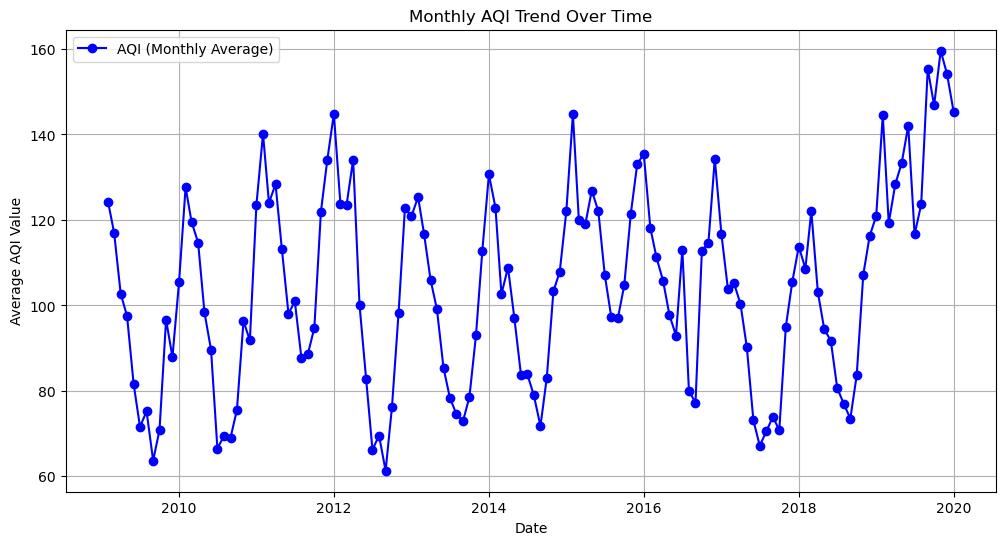

In [53]:
monthly_aqi = data.resample('M', on='Date')['AQI'].mean()

# Create a line plot for AQI vs. month
plt.figure(figsize=(12, 6))
plt.plot(monthly_aqi.index, monthly_aqi.values, color='b', marker='o', linestyle='-', label='AQI (Monthly Average)')
plt.title('Monthly AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
data.columns = data.columns.str.replace(' µg/m3', '')

In [58]:
data.head()

,AQI,Date,SO2,Nox,RSPM,SPM,Location,SO2 BDL,Nox BDL
0,153.0,2009-01-01,15,53,179.0,366.0,Karve Road,0,0
1,141.0,2009-01-01,19,60,161.0,366.0,Swargate,0,0
2,127.0,2009-01-02,0,16,140.0,261.0,Karve Road,1,0
3,101.0,2009-01-04,26,28,102.0,261.0,Bhosari,0,0
4,133.0,2009-01-04,20,20,150.0,234.0,Karve Road,0,0


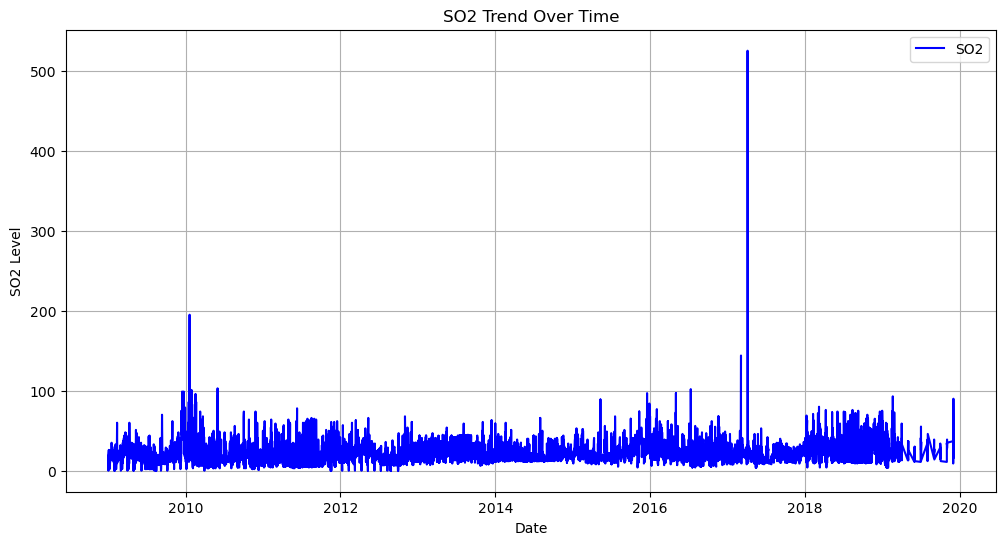

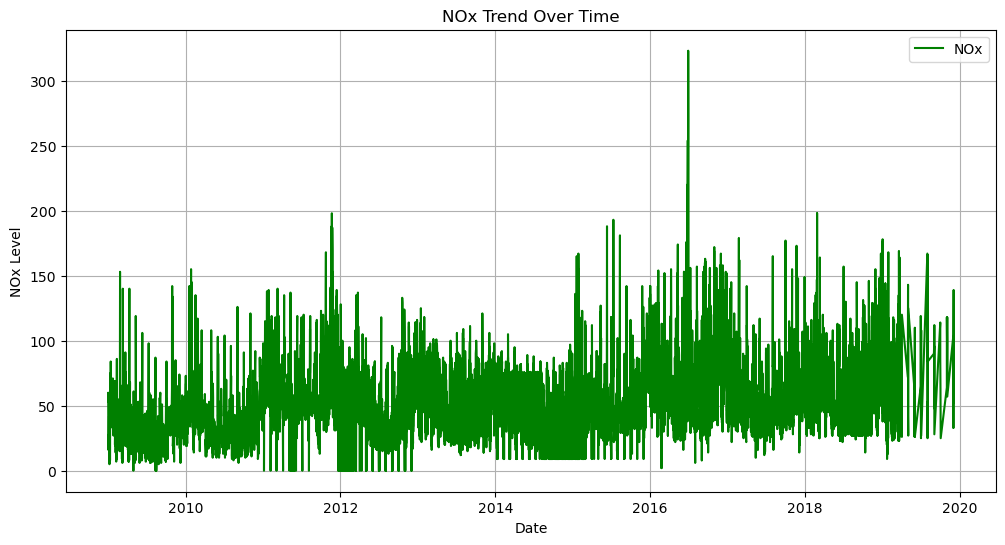

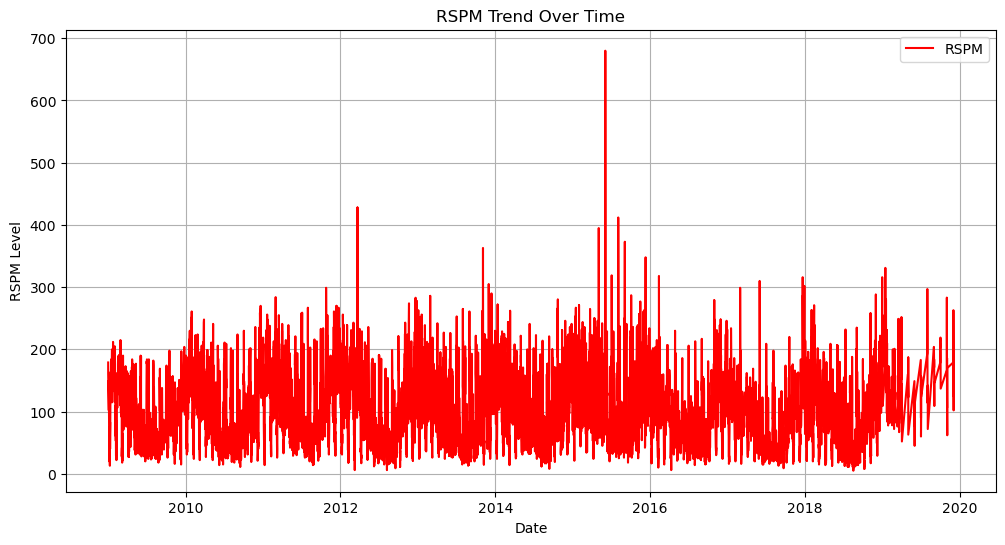

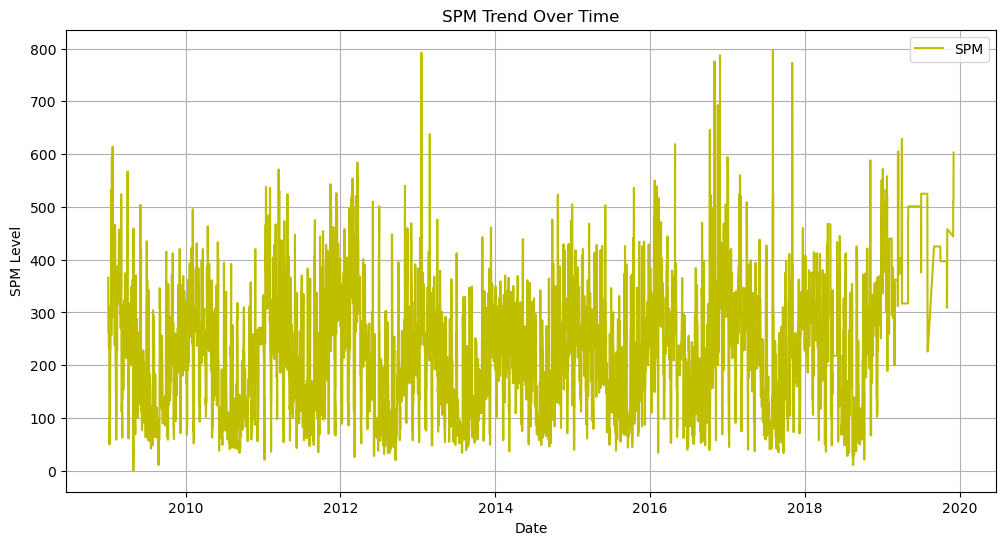

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with the specified columns

# Create separate line plots for each pollutant
plt.figure(figsize=(12, 6))

# PM2.5
plt.plot(data['Date'], data['SO2'], label='SO2', color='b')
plt.title('SO2 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('SO2 Level')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

# PM10
plt.plot(data['Date'], data['Nox'], label='NOx', color='g')
plt.title('NOx Trend Over Time')
plt.xlabel('Date')
plt.ylabel('NOx Level')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

# CO
plt.plot(data['Date'], data['RSPM'], label='RSPM', color='r')
plt.title('RSPM Trend Over Time')
plt.xlabel('Date')
plt.ylabel('RSPM Level')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
# SPM
plt.plot(data['Date'], data['SPM'], label='SPM', color='y')
plt.title('SPM Trend Over Time')
plt.xlabel('Date')
plt.ylabel('SPM Level')
plt.legend()
plt.grid(True)
plt.show()

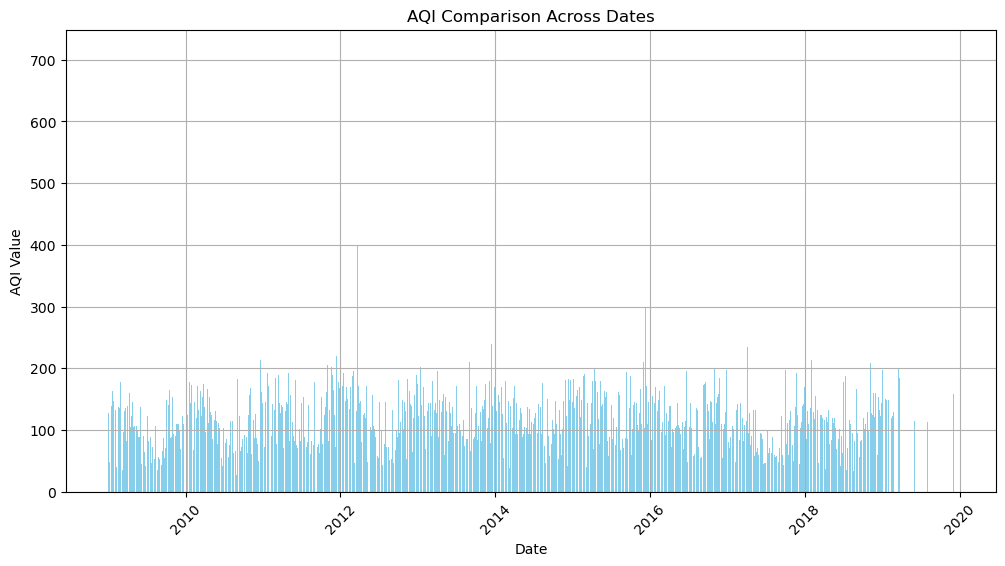

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with 'Date' and 'AQI' columns

# Create a bar plot to compare AQI values across different dates
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['AQI'], color='skyblue')
plt.title('AQI Comparison Across Dates')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [67]:
data.head()

,AQI,Date,SO2,Nox,RSPM,SPM,Location,SO2 BDL,Nox BDL
0,153.0,2009-01-01,15,53,179.0,366.0,Karve Road,0,0
1,141.0,2009-01-01,19,60,161.0,366.0,Swargate,0,0
2,127.0,2009-01-02,0,16,140.0,261.0,Karve Road,1,0
3,101.0,2009-01-04,26,28,102.0,261.0,Bhosari,0,0
4,133.0,2009-01-04,20,20,150.0,234.0,Karve Road,0,0


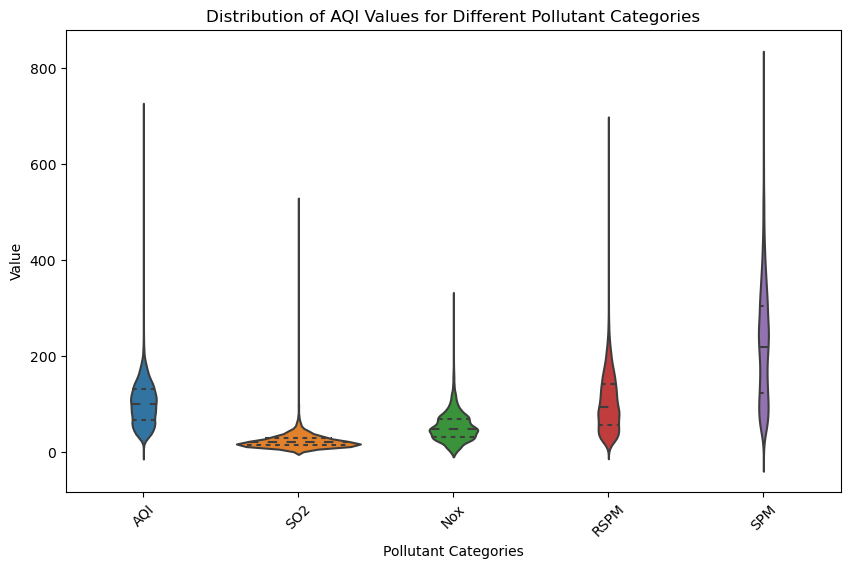

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'data' with columns 'AQI', 'SO2', 'NOx', 'RSPM', 'SPM'

# Create a violin plot for AQI values for different pollutant categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='variable', y='value', data=data[['AQI', 'SO2', 'Nox', 'RSPM', 'SPM']].melt(), inner='quart')
plt.title('Distribution of AQI Values for Different Pollutant Categories')
plt.xlabel('Pollutant Categories')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


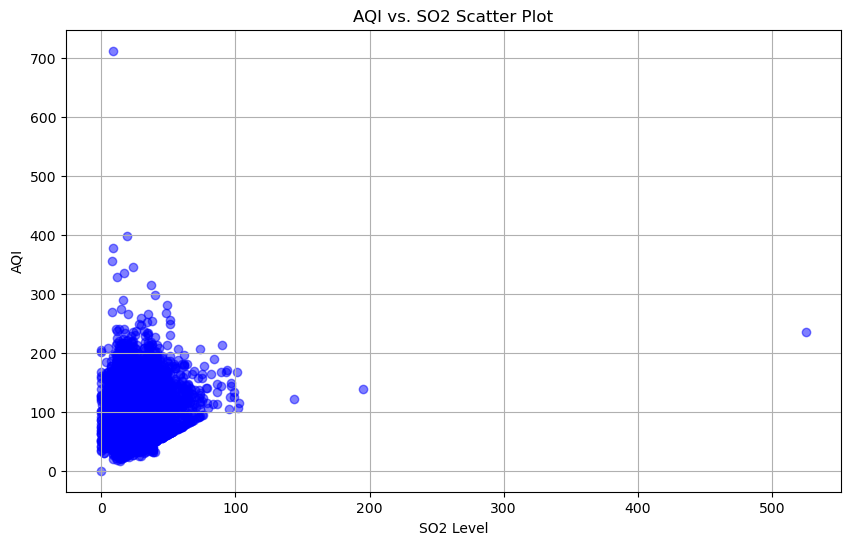

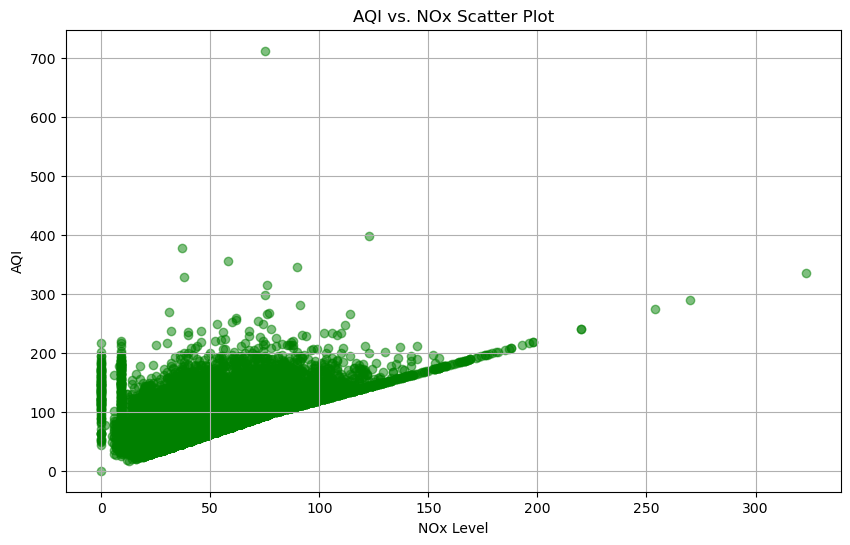

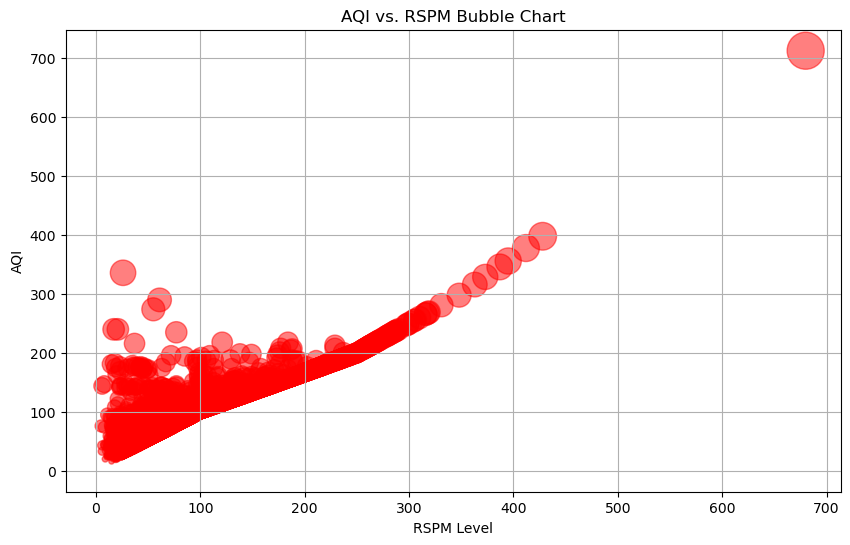

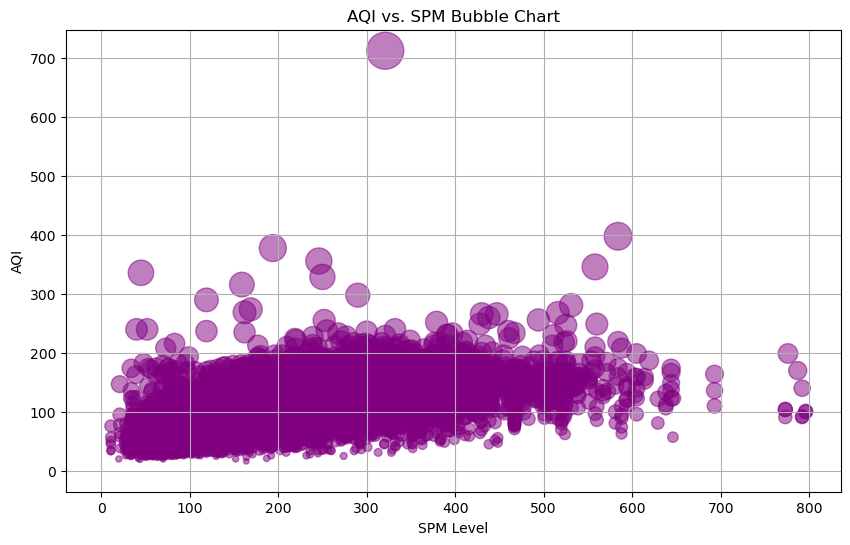

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'data' with columns 'AQI', 'SO2', 'NOx', 'RSPM', 'SPM'

# Scatter plot of AQI vs. SO2
plt.figure(figsize=(10, 6))
plt.scatter(data['SO2'], data['AQI'], alpha=0.5, color='blue')
plt.title('AQI vs. SO2 Scatter Plot')
plt.xlabel('SO2 Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Scatter plot of AQI vs. NOx
plt.figure(figsize=(10, 6))
plt.scatter(data['Nox'], data['AQI'], alpha=0.5, color='green')
plt.title('AQI vs. NOx Scatter Plot')
plt.xlabel('NOx Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Bubble chart of AQI vs. RSPM
plt.figure(figsize=(10, 6))
plt.scatter(data['RSPM'], data['AQI'], s=data['AQI'], alpha=0.5, color='red')
plt.title('AQI vs. RSPM Bubble Chart')
plt.xlabel('RSPM Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Bubble chart of AQI vs. SPM
plt.figure(figsize=(10, 6))
plt.scatter(data['SPM'], data['AQI'], s=data['AQI'], alpha=0.5, color='purple')
plt.title('AQI vs. SPM Bubble Chart')
plt.xlabel('SPM Level')
plt.ylabel('AQI')
plt.grid(True)
plt.show()
